<h1 align="center">CAS Preprocessing</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_theme()

In [2]:
pd.set_option('display.max_columns',None)

## Importing data

In [3]:
df= pd.read_csv('CAS.csv')
df.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashRoadSideRoad,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersection,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1406914.0,4915023.0,1,NaN,602800.0,0.0,NaN,0.0,1.0,NaN,Null,2000/2001,MIDLAND ST,PORTSMOUTH DRIVE,NaN,Non-Injury Crash,No,2000,NaN,East,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,2895200.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Otago Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,70.0,NaN,Null,0.0,0.0,NaN,71.0,Dunedin City,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
1,1799023.0,5814728.0,2,NaN,528900.0,0.0,NaN,0.0,3.0,NaN,North,2011/2012,SH 1N,KILLARNEY ROAD,NaN,Non-Injury Crash,Yes,2012,NaN,South,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Bright sun,915900.0,0.0,0.0,0.0,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Waikato Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,60.0,NaN,Null,0.0,0.0,NaN,16.0,Hamilton City,Unknown,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1741193.0,5976099.0,3,55.0,506660.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,SH 1N,SAUNDERS ROAD,NaN,Non-Injury Crash,Yes,2007,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Twilight,136700.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Auckland Region,Bridge,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,76.0,Auckland,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
3,1790288.0,5837387.0,4,NaN,526601.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,RIVERVIEW ROAD,HAKARIMATA ROAD,NaN,Non-Injury Crash,No,2006,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Overcast,852200.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,13.0,Waikato District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
4,1615675.0,5423627.0,5,NaN,584201.0,0.0,NaN,0.0,2.0,NaN,Null,2003/2004,TALBOT ST,ELIZABETH ST,NaN,Non-Injury Crash,No,2003,NaN,West,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,2361500.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Tasman Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Null,0.0,0.0,NaN,51.0,Tasman District,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null


In [4]:
df.shape

(758757, 72)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758757 entries, 0 to 758756
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          758757 non-null  float64
 1   Y                          758757 non-null  float64
 2   OBJECTID                   758757 non-null  int64  
 3   advisorySpeed              28369 non-null   float64
 4   areaUnitID                 758675 non-null  float64
 5   bicycle                    758752 non-null  float64
 6   bridge                     301585 non-null  float64
 7   bus                        758752 non-null  float64
 8   carStationWagon            758752 non-null  float64
 9   cliffBank                  301585 non-null  float64
 10  crashDirectionDescription  758757 non-null  object 
 11  crashFinancialYear         758757 non-null  object 
 12  crashLocation1             758757 non-null  object 
 13  crashLocation2             75

In [6]:
null_columns = df.columns[df.isnull().any()]
(df[null_columns].isnull().sum()/len(df))*100

advisorySpeed                96.261122
areaUnitID                    0.010807
bicycle                       0.000659
bridge                       60.252755
bus                           0.000659
carStationWagon               0.000659
cliffBank                    60.252755
crashLocation2                0.103327
crashRoadSideRoad           100.000000
debris                       60.252755
directionRoleDescription      0.010675
ditch                        60.252755
fatalCount                    0.018056
fence                        60.252755
guardRail                    60.252755
holiday                      94.603147
houseOrBuilding              60.252755
intersection                100.000000
kerb                         60.252755
meshblockId                   0.010807
minorInjuryCount              0.018056
moped                         0.000659
motorcycle                    0.000659
NumberOfLanes                 0.186094
objectThrownOrDropped        60.252755
otherObject              

## Pre-processing

### Replacing Null with NaN

In [7]:
df.replace("Null",np.NaN,inplace=True)
df.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashRoadSideRoad,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersection,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1406914.0,4915023.0,1,NaN,602800.0,0.0,NaN,0.0,1.0,NaN,NaN,2000/2001,MIDLAND ST,PORTSMOUTH DRIVE,NaN,Non-Injury Crash,No,2000,NaN,East,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,2895200.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Otago Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,70.0,NaN,NaN,0.0,0.0,NaN,71.0,Dunedin City,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,NaN
1,1799023.0,5814728.0,2,NaN,528900.0,0.0,NaN,0.0,3.0,NaN,North,2011/2012,SH 1N,KILLARNEY ROAD,NaN,Non-Injury Crash,Yes,2012,NaN,South,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Bright sun,915900.0,0.0,0.0,0.0,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Waikato Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,60.0,NaN,NaN,0.0,0.0,NaN,16.0,Hamilton City,Unknown,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,NaN
2,1741193.0,5976099.0,3,55.0,506660.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,SH 1N,SAUNDERS ROAD,NaN,Non-Injury Crash,Yes,2007,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Twilight,136700.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Auckland Region,Bridge,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,76.0,Auckland,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,NaN
3,1790288.0,5837387.0,4,NaN,526601.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,RIVERVIEW ROAD,HAKARIMATA ROAD,NaN,Non-Injury Crash,No,2006,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Overcast,852200.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,13.0,Waikato District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,NaN
4,1615675.0,5423627.0,5,NaN,584201.0,0.0,NaN,0.0,2.0,NaN,NaN,2003/2004,TALBOT ST,ELIZABETH ST,NaN,Non-Injury Crash,No,2003,NaN,West,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,2361500.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Tasman Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,NaN,0.0,0.0,NaN,51.0,Tasman District,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,NaN


### Droping attributes with more than 90% missing values

In [8]:
df.drop(["OBJECTID","advisorySpeed","crashRoadSideRoad","tlaId","meshblockId","intersection","areaUnitID","temporarySpeedLimit","pedestrian","holiday","weatherB"],axis=1,inplace=True)
df.drop_duplicates(inplace=True)

### Droping null values in crashSeverity 

In [9]:
df.dropna(subset=['crashSeverity'],inplace=True)

In [10]:
df.shape

(758006, 61)

### Null values count in each attribute

### Handling missing values of fatal count

In [11]:
df['fatalCount'].isna().sum()

137

In [12]:
df['fatalCount'].value_counts()

0.0    750903
1.0      6284
2.0       524
3.0       109
4.0        37
5.0         6
6.0         3
9.0         1
7.0         1
8.0         1
Name: fatalCount, dtype: int64

In [13]:
df['fatalCount'] = df.apply(
    lambda row: 1 if np.isnan(row['fatalCount']) and row['crashSeverity']=='Fatal Crash' else row['fatalCount'],
    axis=1
)
df['fatalCount'].fillna(0,inplace=True)

### Handling missing values of serious injury count

In [14]:
df['seriousInjuryCount'].isna().sum()

137

In [15]:
df['seriousInjuryCount'].value_counts()

0.0     713031
1.0      39345
2.0       4270
3.0        848
4.0        252
5.0         79
6.0         26
7.0          8
8.0          5
10.0         2
9.0          1
14.0         1
12.0         1
Name: seriousInjuryCount, dtype: int64

In [16]:
df['seriousInjuryCount'] = df.apply(
    lambda row: 1 if np.isnan(row['seriousInjuryCount']) and row['crashSeverity']=='Serious Crash' else row['seriousInjuryCount'],
    axis=1
)
df['seriousInjuryCount'].fillna(0,inplace=True)

### Handling missing values of Minor injury count

In [17]:
df['minorInjuryCount'].isna().sum()

137

In [18]:
df['minorInjuryCount'].value_counts()

0.0     569362
1.0     151021
2.0      27999
3.0       6475
4.0       2040
5.0        615
6.0        220
7.0         80
8.0         23
9.0         13
10.0         7
11.0         2
16.0         2
18.0         2
34.0         1
12.0         1
15.0         1
14.0         1
13.0         1
26.0         1
30.0         1
21.0         1
Name: minorInjuryCount, dtype: int64

In [19]:
df['minorInjuryCount'] = df.apply(
    lambda row: 1 if np.isnan(row['minorInjuryCount']) and row['crashSeverity']=='Minor Crash' else row['minorInjuryCount'],
    axis=1
)
df['minorInjuryCount'].fillna(0,inplace=True)

## Handling missing values in all numerical variables

In [20]:
df['bicycle'].fillna(0,inplace=True)
df['bus'].fillna(0,inplace=True)
df['carStationWagon'].fillna(0,inplace=True)
df['moped'].fillna(0,inplace=True)
df['motorcycle'].fillna(0,inplace=True)
df['otherVehicleType'].fillna(0,inplace=True)
df['schoolBus'].fillna(0,inplace=True)
df['suv'].fillna(0,inplace=True)
df['taxi'].fillna(0,inplace=True)
df['truck'].fillna(0,inplace=True)
df['unknownVehicleType'].fillna(0,inplace=True)
df['vanOrUtility'].fillna(0,inplace=True)
df['bridge'].fillna(0,inplace=True)
df['cliffBank'].fillna(0,inplace=True)
df['debris'].fillna(0,inplace=True)
df['ditch'].fillna(0,inplace=True)
df['fence'].fillna(0,inplace=True)
df['truck'].fillna(0,inplace=True)
df['guardRail'].fillna(0,inplace=True)
df['houseOrBuilding'].fillna(0,inplace=True)
df['kerb'].fillna(0,inplace=True)
df['NumberOfLanes'].fillna(1,inplace=True)
df['objectThrownOrDropped'].fillna(0,inplace=True)
df['otherObject'].fillna(0,inplace=True)
df['overBank'].fillna(0,inplace=True)
df['parkedVehicle'].fillna(0,inplace=True)
df['phoneBoxEtc'].fillna(0,inplace=True)
df['postOrPole'].fillna(0,inplace=True)
df['roadworks'].fillna(0,inplace=True)
df['slipOrFlood'].fillna(0,inplace=True)
df['speedLimit'].fillna(0,inplace=True)
df['strayAnimal'].fillna(0,inplace=True)
df['train'].fillna(0,inplace=True)
df['tree'].fillna(0,inplace=True)
df['vehicle'].fillna(0,inplace=True)
df['trafficIsland'].fillna(0,inplace=True)
df['trafficSign'].fillna(0,inplace=True)
df['waterRiver'].fillna(0,inplace=True)

In [21]:
df['crashDirectionDescription'].fillna('None',inplace=True)
df['crashLocation2'].fillna('None',inplace=True)
df['directionRoleDescription'].fillna('None',inplace=True)
df['flatHill'].fillna('None',inplace=True)
df['region'].fillna('None',inplace=True)
df['roadLane'].fillna('None',inplace=True)
df['roadSurface'].fillna('None',inplace=True)
df['streetLight'].fillna('None',inplace=True)
df['tlaName'].fillna('None',inplace=True)
df['weatherA'].fillna('None',inplace=True)

In [22]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [23]:
np.random.seed(108)
df['claimAmount'] = df.apply(lambda row:(row['minorInjuryCount']*np.random.randint(2000000,5000000))+(row['fatalCount']*250000)+(row['seriousInjuryCount']*np.random.randint(5000000,10000000))+np.random.randint(50000,100000), axis = 1)

In [24]:
df = df[df['claimAmount']>0]
df.to_csv("CAS Preprocessed.csv")

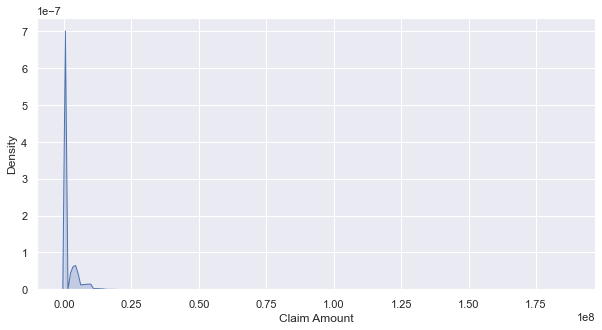

In [25]:
plt.figure(figsize=(10,5))
plt.xlabel('Claim Amount')
plt.ylabel('Density')
sns.kdeplot(df['claimAmount'],shade=True)
plt.show()